In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [2]:

# Importing dataset
df=pd.read_csv("Mall_Customers.csv")

## DataPreprocessing

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum

0

In [7]:
df.shape



(200, 5)

In [8]:
df.drop(columns=["CustomerID"],inplace=True)

In [9]:
# Label encoding Gender Value

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
x=df.iloc[:,:]


In [10]:

#  Reducing 4 dimensional data into 2 Dimension
pca = PCA(n_components=2)
x = pca.fit_transform(x)


In [12]:
# Standardizing the values in the data features 
st = StandardScaler()
x = st.fit_transform(x)


In [13]:
#  Spillitting data into train and test
xtrain,xtest=train_test_split(x,test_size=0.2,random_state=42)


In [14]:

# Check shapes
print("Training Shape:", xtrain.shape)
print("Testing Shape:", xtest.shape)


Training Shape: (160, 2)
Testing Shape: (40, 2)


## Model development

In [15]:

model=KMeans(n_clusters=2)
model.fit(xtrain)
model.inertia_# finding the wcss (within the cluster sum of squared values)

222.7132299625777

In [16]:

# road to Elbow Curve 
inertia=[]
for i in range(1,20):
    model=KMeans(n_clusters=i,)
    model.fit(xtrain)
    inertia.append(model.inertia_)

In [17]:

print(np.min(inertia))
inertia=np.array(inertia)

11.31564735089253


In [18]:
# inertia
np.where(inertia==9.936577149850866)

(array([], dtype=int64),)

<Axes: >

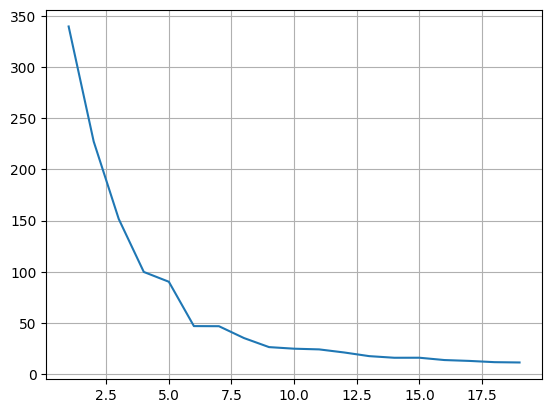

In [19]:

# Visualizing Elbow Curve 
plt.grid()
sns.lineplot(x=np.arange(1,20),y=inertia)

In [20]:

#  Training model by analyzing Elbow Curve
model=KMeans(n_clusters=4)
model.fit(xtrain)

KMeans(n_clusters=4)

In [23]:

# classifying data into clusters for xtrain xtest and x
y1=model.predict(xtrain)
y2=model.predict(xtest)
y3=model.predict(x)

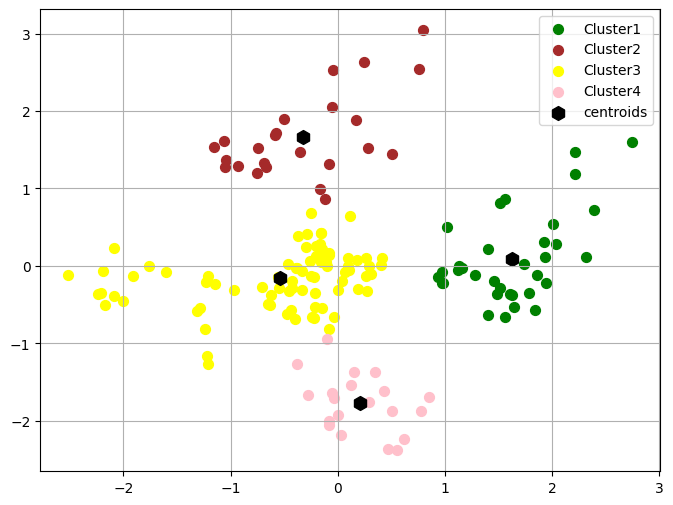

In [24]:

#  Plotting clusters
plt.figure(figsize=(8,6))
plt.grid()
plt.scatter(xtrain[y1==0,0],xtrain[y1==0,1],s=50,c='green',label="Cluster1")
plt.scatter(xtrain[y1==1,0],xtrain[y1==1,1],s=50,c='brown',label="Cluster2")
plt.scatter(xtrain[y1==2,0],xtrain[y1==2,1],s=50,c='yellow',label="Cluster3")
plt.scatter(xtrain[y1==3,0],xtrain[y1==3,1],s=50,c='pink',label="Cluster4")
# plt.scatter(xtrain[y1==4,0],xtrain[y1==4,1],s=50,c='purple',label="Cluster5")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,marker='h',label="centroids",c='black')
plt.legend()
plt.show()

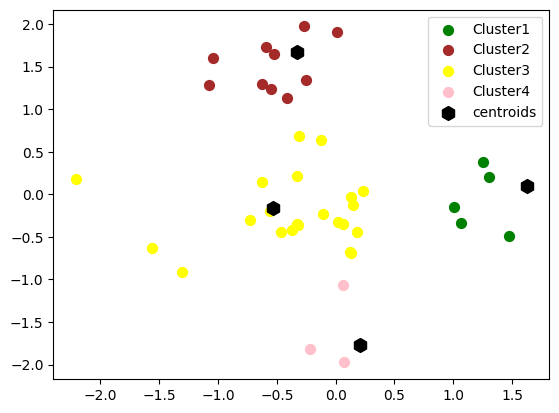

In [26]:

plt.scatter(xtest[y2==0,0],xtest[y2==0,1],s=50,c='green',label="Cluster1")
plt.scatter(xtest[y2==1,0],xtest[y2==1,1],s=50,c='brown',label="Cluster2")
plt.scatter(xtest[y2==2,0],xtest[y2==2,1],s=50,c='yellow',label="Cluster3")
plt.scatter(xtest[y2==3,0],xtest[y2==3,1],s=50,c='pink',label="Cluster4")

# plt.scatter(x[y==3,0],x[y==3,1],s=50,c='red',label="Cluster4")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,marker='h',label="centroids",c='black')
plt.legend()
plt.show()